<a href="https://colab.research.google.com/github/Nadian-Ali/GeoImageClassificaiton/blob/main/exploreData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#what is 236?  got it!

#same rock / different depth / different pattern /// same class? or two classes? 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive'


/content/drive/My Drive


In [ ]:
import os 
from os import listdir
from os.path import isfile, join
import numpy as np

from google.colab.patches import cv2_imshow



In [ ]:

Alis = 'Projects/GeoSampleClassification/data'
folder_location_in_drive= os.path.join(os.getcwd(),Alis)

file_names = [f for f in listdir(folder_location_in_drive) if( f.split('.')[-1]=='las' and isfile(join(folder_location_in_drive, f)))] #get list of the files with las extension 


In [ ]:

# the FMI_reader function reads the .las files that contain FMI resistivity values.
# the output of the function is two numpy arrays 
#1. data which is 2D array with 192 colums and rows equal to the number of depth samples 
#2. the depth array which is a 1D array and contains all the depth
# samples
def FMI_reader(path):
    # f = open(path, 'r')
    # content = f.readlines()
    # f.close()
    with open(path,'r') as file:
      content  = file.readlines()
    data = []
    depth = []
    rock_type = path.split('.')[0].split('_')[0].split('/')[-1]
    for L in content:
        L = L.split(' ')
        res = [st for st in L if st != "" and st != '\n']
        if res[0] == '~Ascii':
            continue
        elif res[0] == '~Version':
            break
        elif len(res) == 1:
            depth.append(float(res[0]))
        else:
            data.extend(list(map(float, res)))

    data = np.array(data)
    depth = np.array(depth)
    data = np.reshape(data, (-1, 192))

    return data, depth, rock_type

SstLoa


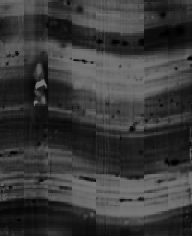

SstLoa
SstLoa


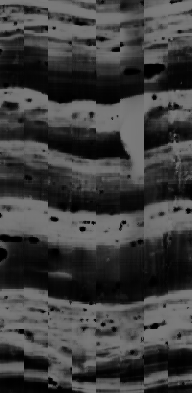

SstLoa
SstHia


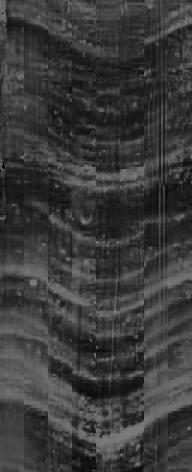

SstHia
SstHia


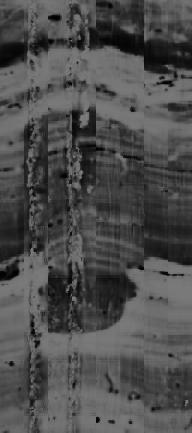

SstHia
CemtLa


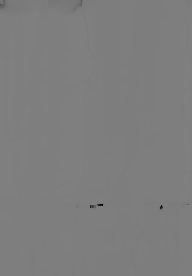

CemtLa
CemtLa


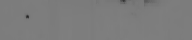

CemtLa
HetLoc


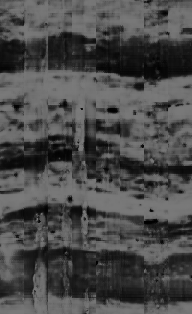

HetLoc
HetLoc


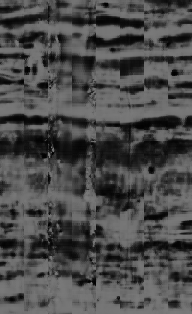

HetLoc
HetHic


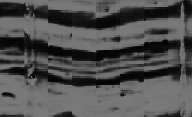

HetHic
HetHic


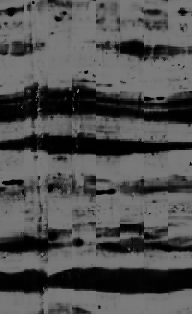

HetHic


In [ ]:
for file in file_names:
  path = os.path.join( os.path.join(os.getcwd(),Alis,file))
  # print(path)
  # path = '/content/drive/MyDrive/Projects/GeoSampleClassification/data/SstLoa_1.las'
  data,depth,rock_type = FMI_reader(path)
  # cv2_imshow(data)
  # print(np.shape(data))
  print(rock_type)
  cv2_imshow(data)
  print(rock_type)